# 본게임 리뷰 데이터 전처리

In [5]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_eng_neg=pd.read_csv('/content/drive/MyDrive/wanted/negative리뷰 english언어.csv', index_col='Unnamed: 0')
df_eng_pos=pd.read_csv('/content/drive/MyDrive/wanted/positive리뷰 english언어.csv', index_col='Unnamed: 0')
df_kor_neg=pd.read_csv('/content/drive/MyDrive/wanted/negative리뷰 koreana언어.csv', index_col='Unnamed: 0')
df_kor_pos=pd.read_csv('/content/drive/MyDrive/wanted/positive리뷰 koreana언어.csv', index_col='Unnamed: 0')

<ipython-input-7-f3777cbc81fe>:1: DtypeWarning: Columns (41,45,48,52,53,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,105,122,794) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eng_neg=pd.read_csv('/content/drive/MyDrive/wanted/negative리뷰 english언어.csv', index_col='Unnamed: 0')
<ipython-input-7-f3777cbc81fe>:2: DtypeWarning: Columns (107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239

In [8]:
# 주석처리해가며, 하나씩 정상적 호출 되었는지 확인.
df_kor_pos.head()
df_kor_neg.tail()
df_eng_pos.head()
df_eng_neg.head()

0  \
0  Posted: 10 December, 2020   
1      Posted: 13 June, 2021   
2  Posted: 23 December, 2021   
3      Posted: 24 June, 2023   
4      Posted: 7 March, 2023   

                                                   1    2  \
0                      $764 "DLC" for the full game.  NaN   
1  Sims 4 is a lot of fun but the exorbitant pric...  NaN   
2  Congratulations EA you have unlocked a review!...  NaN   
3                      $764 "DLC" for the full game.  NaN   
4                      $995 "DLC" for the full game.  NaN   

                             3    4    5    6    7    8    9  ... 784 785 786  \
0  Go f͏u͏c͏k͏ yourselves, EA.  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
1                          NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
2                          NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
3  Go f͏u͏c͏k͏ yourselves, EA.  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
4  Go f͏u͏c͏k͏ yourselves, EA.  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   

  787 788 789 790 791 792  793  
0 NaN NaN NaN NaN NaN NaN  NaN  
1 NaN NaN NaN NaN NaN NaN  NaN  
2 NaN NaN NaN NaN NaN NaN  NaN  
3 NaN NaN NaN NaN NaN NaN  NaN  
4 NaN NaN NaN NaN NaN NaN  NaN  

[5 rows x 794 columns]

## 날짜 포맷 형식 변경

In [9]:
import datetime as dt

In [10]:
df_kor_pos['0']

0            Posted: 16 May, 2021
1          Posted: 3 August, 2023
2           Posted: 19 June, 2020
3           Posted: 7 April, 2022
4       Posted: 21 December, 2020
                  ...            
1943      Posted: August 10, 2020
1944        Posted: July 28, 2020
1945        Posted: July 19, 2020
1946         Posted: July 4, 2020
1947        Posted: June 28, 2020
Name: 0, Length: 1948, dtype: object

In [11]:
date1 = list(df_kor_pos['0'].values)
date1

['Posted: 16 May, 2021',
 'Posted: 3 August, 2023',
 'Posted: 19 June, 2020',
 'Posted: 7 April, 2022',
 'Posted: 21 December, 2020',
 'Posted: 23 April, 2022',
 'Posted: 12 March, 2021',
 'Posted: 29 July, 2021',
 'Posted: 30 July, 2022',
 'Posted: 8 January',
 'Posted: July 21, 2023',
 'Posted: January 14',
 'Posted: May 24',
 'Posted: October 9, 2022',
 'Posted: October 29, 2023',
 'Posted: November 28, 2021',
 'Posted: November 29, 2020',
 'Posted: January 22, 2022',
 'Posted: July 8, 2021',
 'Posted: September 29, 2022',
 'Posted: July 1, 2021',
 'Posted: March 29',
 'Posted: July 3, 2023',
 'Posted: October 1, 2020',
 'Posted: May 25, 2022',
 'Posted: November 8, 2022',
 'Posted: February 17',
 'Posted: August 24, 2022',
 'Posted: May 1, 2022',
 'Posted: December 31, 2021',
 'Posted: November 27, 2021',
 'Posted: February 2, 2022',
 'Posted: December 30, 2020',
 'Posted: April 20, 2023',
 'Posted: November 15, 2023',
 'Posted: April 30, 2023',
 'Posted: June 19, 2022',
 'Posted: 

In [12]:
df_list=[df_eng_neg,df_eng_pos,df_kor_neg,df_kor_pos] #데이터 프레임이 담겨있는 리스트

for dafr in df_list:
    date1 = list(dafr['0'].values)
    date_list=[]
    for date in date1:
        a=date.replace('Posted: ','')
        if ',' not in a:
            a=a + ', 2024'
        date_list.append(a)
    dafr['0']=date_list
    dafr.rename(columns={'0':'작성일'},inplace=True)


In [13]:
df_kor_pos.head() #일먼저저
df_kor_neg.tail() #월 먼저
df_eng_pos.head() #일먼저
df_eng_neg.head() #일먼저

작성일                                                  1    2  \
0  10 December, 2020                      $764 "DLC" for the full game.  NaN   
1      13 June, 2021  Sims 4 is a lot of fun but the exorbitant pric...  NaN   
2  23 December, 2021  Congratulations EA you have unlocked a review!...  NaN   
3      24 June, 2023                      $764 "DLC" for the full game.  NaN   
4      7 March, 2023                      $995 "DLC" for the full game.  NaN   

                             3    4    5    6    7    8    9  ... 784 785 786  \
0  Go f͏u͏c͏k͏ yourselves, EA.  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
1                          NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
2                          NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
3  Go f͏u͏c͏k͏ yourselves, EA.  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   
4  Go f͏u͏c͏k͏ yourselves, EA.  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN   

  787 788 789 790 791 792  793  
0 NaN NaN NaN NaN NaN NaN  NaN  
1 NaN NaN NaN NaN NaN NaN  NaN  
2 NaN NaN NaN NaN NaN NaN  NaN  
3 NaN NaN NaN NaN NaN NaN  NaN  
4 NaN NaN NaN NaN NaN NaN  NaN  

[5 rows x 794 columns]

In [14]:
df_kor_pos['작성일'] = pd.to_datetime(df_kor_pos['작성일'], format='mixed', dayfirst=True).dt.strftime("%Y-%m-%d")
df_kor_neg['작성일'] = pd.to_datetime(df_kor_neg['작성일'], format='mixed', dayfirst=True).dt.strftime("%Y-%m-%d")
df_eng_pos['작성일'] = pd.to_datetime(df_eng_pos['작성일'], format='mixed', dayfirst=True).dt.strftime("%Y-%m-%d")
df_eng_neg['작성일'] = pd.to_datetime(df_eng_neg['작성일'], format='mixed', dayfirst=True).dt.strftime("%Y-%m-%d")


In [15]:
df_kor_neg

작성일                                                  1  \
0    2021-02-07  기본적으로 있어야 할만한 모드들이나 cc들은 거의 유저들이 만듭니다. 그리고 팩을 ...   
1    2020-12-18                                               dlc즈   
2    2020-07-22  역시 EA는 돈에 미쳐있다 전작보다 떨어지는 자유도 때문에 많이 짜증났고 DLC의 ...   
3    2022-05-04                Q:왜 한 게임에 넣을 수 있는 걸 DLC로 조각내서 파는거죠?   
4    2022-06-24  데모 버전을 사고 사혼의 구슬마냥 본편 파편들을 사서 끼워 맞춰 완성 시켜야 하는 ...   
..          ...                                                ...   
298  2020-09-30                              게임자체는 너무 좋은데 돈이 문제네요.   
299  2020-10-16      after the latest update i cannot play my game   
300  2020-09-09                                    dlc좀 그만 팔아 개년들아   
301  2020-09-05                                             멀티좀 제발   
302  2020-09-20  이게 진짜 발매된지 몇 년 지난 게임이 맞는건지.. 자고 일어나면 벽을 뚫고 나가는...   

                                                     2  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                             A:돈 벌려고요   
4                                                  NaN   
..                                                 ...   
298  제가 느낀점은 무엇인지 말씀드리자면 본체 저렴한 가격으로 구매하게 한다음 확장팩DL...   
299  i think i paid around 150$ just a month ago bu...   
300                                                NaN   
301                                                NaN   
302                                                NaN   

                                                     3  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3              Q:왜 이전에는 심즈를 비싼 가격에 팔다가 이제 와서 무료로 파는거죠?   
4                                                  NaN   
..                                                 ...   
298                  세일이라도 자주 해주면 좋을거같은데 세일자체를 잘 안하시는듯   
299  i just sent my money to steam and EA wow i hop...   
300                                                NaN   
301                                                NaN   
302                                                NaN   

                                                     4    5    6    7    8  \
0                                                  NaN  NaN  NaN  NaN  NaN   
1                                                  NaN  NaN  NaN  NaN  NaN   
2                                                  NaN  NaN  NaN  NaN  NaN   
3            A:더 많은 사람들이 DLC를 사서 큰 이득을 쳐 볼려는 마케팅 전략입니다  NaN  NaN  NaN  NaN   
4                                                  NaN  NaN  NaN  NaN  NaN   
..                                                 ...  ...  ...  ...  ...   
298                                                NaN  NaN  NaN  NaN  NaN   
299  and also they are maybe too busy to answer my ...  NaN  NaN  NaN  NaN   
300                                                NaN  NaN  NaN  NaN  NaN   
301                                                NaN  NaN  NaN  NaN  NaN   
302                                                NaN  NaN  NaN  NaN  NaN   

       9  ...   30  31   32  33   34  35   36   37  38   39  
0    NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
1    NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
2    NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
3    NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
4    NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
..   ...  ...  ...  ..  ...  ..  ...  ..  ...  ...  ..  ...  
298  NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
299  NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
300  NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
301  NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  
302  NaN  ...  NaN NaN  NaN NaN  NaN NaN  NaN  NaN NaN  NaN  

[303 rows x 40 columns]

## 나눠져 있는 리뷰 하나의 열로 합치기

In [16]:
for dafr in df_list:
    dafr.fillna(" ",inplace=True)

<ipython-input-16-04af516010ab>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dafr.fillna(" ",inplace=True)


In [17]:
df_kor_pos.head()
df_kor_neg.tail()
df_eng_pos.head()
df_eng_neg.head()

작성일                                                  1  2  \
0  2020-12-10                      $764 "DLC" for the full game.      
1  2021-06-13  Sims 4 is a lot of fun but the exorbitant pric...      
2  2021-12-23  Congratulations EA you have unlocked a review!...      
3  2023-06-24                      $764 "DLC" for the full game.      
4  2023-03-07                      $995 "DLC" for the full game.      

                             3  4  5  6  7  8  9  ... 784 785 786 787 788 789  \
0  Go f͏u͏c͏k͏ yourselves, EA.                    ...                           
1                                                 ...                           
2                                                 ...                           
3  Go f͏u͏c͏k͏ yourselves, EA.                    ...                           
4  Go f͏u͏c͏k͏ yourselves, EA.                    ...                           

  790 791 792 793  
0                  
1                  
2                  
3                  
4                  

[5 rows x 794 columns]

In [18]:
df_kor_pos.columns

Index(['작성일', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '122', '123', '124', '125', '126', '127', '128', '129', '130', '131'],
      dtype='object', length=132)

In [19]:
for dafr in df_list:
    dafr['리뷰내용']=dafr['1']
    for cl in dafr.columns:
        if cl == '작성일':
            continue
        if cl == '1':
            continue
        else:
            dafr['리뷰내용'] +=(" "+dafr[cl])


<ipython-input-19-33cb724f4fc7>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dafr['리뷰내용']=dafr['1']


In [20]:
df_kor_pos.head()

작성일                                                 1  \
0  2021-05-16                                   확장팩 사시려면 추천하는 거   
1  2023-08-03          집도 막 짓고 싶고 하고 싶은 것도 많은데 어떻게 해야 할지 모르겠나요?   
2  2020-06-19                         오리진에서 구입한 dlc도 스팀하고 연동되네요   
3  2022-04-07                                   직업 갖고 싶으면 dlc사고   
4  2020-12-21  팁 : 환경설정에서 나이드는 속도를 조정하면 플레이하는동안 나이를 쉽게 먹지 않습니다.   

                                          2  \
0                                  사계절(1순위)   
1            따라만 하세요 1시간 이내에 20만을 벌 수 있습니다.   
2                                             
3                             취미 가지려면 dlc사고   
4  또 한가지는 야망을 달성하여 점수를 받아서 나이 줄어드는 약을 사먹는다면   

                                            3  \
0           스파 데이(커뮤니티에 이 팩 쓴 부지/인테리어가 엄청 많음)   
1                                               
2                                               
3                                 청소하려면 dlc사고   
4  플레이를 계속 하는동안 영원히 나이 들지 않는 불로장생을 하게 될 것입니다.   

                                      4  \
0      외식하기 좋은 날(주방 업그레이드 팩도 같이 사면 재미남)   
1                   1. 가장 싼 부지를 사서 시작한다   
2                                         
3                           학교가려면 dlc사고   
4  DLC팩은 자신이 가장 재밌어보이거나 관심있는 팩을 사면 되겠지만   

                                                   5  \
0                다 함께 놀아요(이것도 커뮤니티에 쓰이는 부지/인테리어가 많음)   
1  2. 집 지을 생각말고 가장 부자가 사는 동네로 이동해서 부자 심이 사는 집으로 무...   
2                                                      
3                       인생 시뮬레이션 게임에 기본적으로 있어야 할 것들을   
4  개인적인 가성비는 GET TO WORK, 모두함께놀아요, 시끌벅적도시생활, 사계절이야기,   

                                                6  \
0    스타 탄생(컨텐츠가 많이 추가됨. 호환되는 모드/커뮤니티 컨텐츠가 많아서 추천)   
1       3. 부자 심 한명과 물고 늘어져서 관계를 늘리기 위해 아부를 오지게 떤다   
2                                                   
3                          죄다 쪼개서 dlc로 파는 상도덕없는놈들   
4  스타탄생, 겨울이야기정도 일 것 같고, 게임팩으로는 정글 어드벤쳐, 외식하기좋은날,   

                                                   7  \
0                                                      
1  4. 어느정도 관계가 쌓이면 부자 심에게 이사오기 권유를 할 수 있게 되고 이걸 눌...   
2                                                      
3                                                      
4          스파데이, 육아일기정도 추천해드려요. 하지만 게임팩은 너무 기대는 마셔요.   

                                                   8  \
0     그 외에는 개인적으로는 뱀파이어 팩이 장기적으로도 계속 쓰이고 해서 나름 재밌네요.   
1  5. 내 심을 부자 집으로, 부자 심을 내 집으로 옮기고 크레딧을 전부 내 심에게 ...   
2                                                      
3                                                      
4                                                      

                                                  9  ... 123 124 125 126 127  \
0                                                    ...                       
1  6. 부지의 건물을 전부 매각 때리면 건물 가격에 따라 20~35만 크레딧이 들어온다.  ...                       
2                                                    ...                       
3                                                    ...                       
4                        만약 잠겨있는 맵을 우선적으로 여는걸 원하신다면  ...                       

  128 129 130 131                                               리뷰내용  
0                  확장팩 사시려면 추천하는 거 사계절(1순위) 스파 데이(커뮤니티에 이 팩 쓴 부지/...  
1                  집도 막 짓고 싶고 하고 싶은 것도 많은데 어떻게 해야 할지 모르겠나요? 따라만 하...  
2                  오리진에서 구입한 dlc도 스팀하고 연동되네요                     ...  
3                  직업 갖고 싶으면 dlc사고 취미 가지려면 dlc사고 청소하려면 dlc사고 학교가려...  
4                  팁 : 환경설정에서 나이드는 속도를 조정하면 플레이하는동안 나이를 쉽게 먹지 않습니...  

[5 rows x 133 columns]

In [21]:
for dafr in df_list:
    for cl in dafr.columns:
        dafr.drop(list(dafr.columns)[1:-1],axis=1,inplace=True)

In [22]:
df_eng_pos.head()

작성일                                               리뷰내용
0  2022-10-19  To those who got it for free: Download mods in...
1  2022-09-14  HEADS UP FOR POTENTIAL BUYERS - The base game ...
2  2020-10-15  It's fun, but it feels empty without the very ...
3  2022-10-18  Don't buy DLC download mods instead The base g...
4  2021-11-30  just wish dlc prices were lower lol           ...

In [23]:
df_kor_pos.to_csv("[전처리 완료] positive 리뷰 KOR.csv")
df_kor_neg.to_csv("[전처리 완료] negative 리뷰 KOR.csv")
df_eng_pos.to_csv("[전처리 완료] positive 리뷰 ENG.csv")
df_eng_neg.to_csv("[전처리 완료] negative 리뷰 ENG.csv")

# 본게임 리뷰 형태소 분석

In [29]:
!pip install konlpy
!pip install nltk

from konlpy.tag import Okt #한국어 형태소 분석
import nltk #영어 형태소 분석
from collections import Counter  #단어의 개수와 순서쌍 만들기기
from wordcloud import WordCloud #워드클라우드 그리기
from nltk.corpus import stopwords
import re
nltk.download('stopwords') #최초 실행시 필요(필요없으면 주석처리)
nltk.download('punkt_tab') #최초 실행시 필요(필요없으면 주석처리)
nltk.download('wordnet') #최초 실행시 필요(필요없으면 주석처리)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

일부 리뷰를 살펴보았을 때, 특수기호를 사용한 이모티콘이 다수 존재함을 확인. -> 정규처리를 통해 일부 리뷰를 지울필요가 있음을 확인


아울러, 불용어와 정규화를 통해 리뷰를 정리할 필요가 있어보임

In [30]:
# 각각 데이터프레임에서 리뷰내용에 해당하는 내용 리스트화화
kor_pos_list=df_kor_pos["리뷰내용"].tolist()
kor_neg_list=df_kor_neg["리뷰내용"].tolist()
eng_pos_list=df_eng_pos["리뷰내용"].tolist()
eng_neg_list=df_eng_neg["리뷰내용"].tolist()

In [31]:
eng_list= [eng_pos_list,eng_neg_list]
kor_list= [kor_pos_list,kor_neg_list]

reg_eng=[]
reg_kor=[]

## 영어리뷰 불용어와 정규처리

In [32]:
#영어 불용어 리스트
eng_stopwords=stopwords.words('english')
eng_stopwords=eng_stopwords+['game','sims','received','Product','free','like','get','play']
print(eng_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
#영어 리뷰에 정규표현이 필요한 예시

df_eng_pos.iloc[269]['리뷰내용']

'⣴⣿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⣼⣿⣿⣿⣷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⣼⣿⣿⣿⣿⣿⣿⣿⣦⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣶⣤⣤⣶⣶⣿⣿⡗ ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠟⠀ ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠃ ⣿⣿⡇⠜⠙⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀Got a cat here ⣿⣿⣿⣶⣿⣿⣿⣿⣿⠋⡹⠙⣿⣿⣿⡇⠀ Friends passing ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣶⣾⣿⣿⠛⠀⠀by can touch him ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡟⠛⠁⠀⠀and click Like to pet ⣿⣿⡿⠻⠿⠿⠿⠿⠛⠹⠑⠀⠀ ⠟⠁⠀                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [34]:
# 표제어를 통한 정규화 필요
from nltk.stem import WordNetLemmatizer
# 토큰화에 필요한 라이브러리 호출
from nltk.tokenize import word_tokenize


In [35]:
# 자연어 정규처리및 정규화(표제화를 통한 의미 통합합)
for reviews in eng_list:
    sub_list=[]
    for review in reviews:
        result = re.sub(r" {2,}", " ", review) #전처리 과정에서 Na값을 다 공백으로 처리해 과도한 공백이 삽입된 것으로 보인다. 정규표현식을 통하여 ' '이 3칸이상인 것은 모두 없앤앤다.
        result = re.sub("[^0-9a-zA-Z가-힣\\s+]", "", result) #특수기호 삭제제
        result = result.lower() #모두 소문자화
        sub_list.append(result)
    reg_eng.append(sub_list)


In [36]:
reg_eng

[['to those who got it for free download mods instead of buying cashgrab dlcs to those who got it for free download mods instead of buying cashgrab dlcs ',
  'heads up for potential buyers  the base game will be free to play from oct 18th  heads up for potential buyers  the base game will be free to play from oct 18th  ',
  'its fun but it feels empty without the very overpriced dlc its fun but it feels empty without the very overpriced dlc ',
  'dont buy dlc download mods instead the base game is free because you have to buy 90 of the rest of the game dont buy dlc download mods instead the base game is free because you have to buy 90 of the rest of the game ',
  'just wish dlc prices were lower lol just wish dlc prices were lower lol ',
  'to those who got it for free download mods instead of buying cashgrab dlcs to those who got it for free download mods instead of buying cashgrab dlcs ',
  'to those who got it for free download mods instead of buying cashgrab dlcs to those who got i

In [37]:
reg_eng[1]

['764 dlc for the full game go fuck yourselves ea 764 dlc for the full game go fuck yourselves ea ',
 'sims 4 is a lot of fun but the exorbitant prices on the dlc are just too much the dlc really adds a lot to the game so not having it hurts sims 4 is a lot of fun but the exorbitant prices on the dlc are just too much the dlc really adds a lot to the game so not having it hurts ',
 'congratulations ea you have unlocked a review to upgrade this review to positive you can purchase our dlc positive review package to enjoy the complete review now only for 40 congratulations ea you have unlocked a review to upgrade this review to positive you can purchase our dlc positive review package to enjoy the complete review now only for 40 ',
 '764 dlc for the full game go fuck yourselves ea 764 dlc for the full game go fuck yourselves ea ',
 '995 dlc for the full game go fuck yourselves ea 995 dlc for the full game go fuck yourselves ea ',
 'while i love the sims and this entry certainly runs smoot

In [38]:
#reg_eng # [0]은 긍정 [1]은 부정이다.
# 소문자화 하고 특수기호만 제거한 상태에서 dlc 관련 내용을 포함한 리뷰만을 추출하고자 불용어를 필터링하기 전 dlc키워드 필터링을 먼저 진행하고자 한다.
# 즉, dlc키워드를 가진 리뷰와 모든 리뷰로 나눠서 분석할 예정이다.

dlc_keywords_eng=['dlc', 'worth', 'purchase', 'download', 'new', 'feature', 'expansion','kit','pack','cash','expansion']
dlc_reg_eng=[]

for eng_r in reg_eng:
    sub_list=[]
    for r in eng_r:
        a=r.split(" ")
        for word in a:
            if word in dlc_keywords_eng:
                sub_list.append(r)
            else:
                continue
    dlc_reg_eng.append(sub_list)


In [39]:
#키워드가 있을 때 마다 본 리뷰를 넣으라했으니 중복 리뷰를 삭제하자자
dlc_reg_eng[0]=list(set(dlc_reg_eng[0]))
dlc_reg_eng[1]=list(set(dlc_reg_eng[1]))

dlc_reg_eng

Output hidden; open in https://colab.research.google.com to view.

In [40]:
# dlc키워드로 뽑은 리뷰들은 당연히 dlc keyword 리스트에 있는 것들이 많이 잡힐테니, 불용어로 추가 제거 해준다.

dlc_eng_stopwords = dlc_keywords_eng+eng_stopwords
print(dlc_eng_stopwords)

['dlc', 'worth', 'purchase', 'download', 'new', 'feature', 'expansion', 'kit', 'pack', 'cash', 'expansion', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',

In [41]:
#  reg_eng #모든 리뷰
# dlc_reg_eng #dlc 키워드 포함


#각 리스트에 담긴 리뷰들을 불용어로 거른 뒤 각각 표제어를 뽑아 토큰화 하는 과정이다.


reg_eng_2=[]
dlc_reg_eng_2=[]

for i in reg_eng: #전체 영어리뷰뷰
    sub_list=[]
    for j in i:
        print(j)
        tokens = word_tokenize(j)
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in eng_stopwords] #불용어
        lemmatizer =WordNetLemmatizer() # 객체이기 때문에 word별로 객체 초기화 필요
        lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens] #표제어
        sub_list.append(lemmatized_tokens)
    reg_eng_2.append(sub_list)


for i in dlc_reg_eng:    #dlc 영어리뷰뷰
    sub_list=[]
    for j in i:
        tokens = word_tokenize(j)
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in dlc_eng_stopwords]#불용어
        lemmatizer =WordNetLemmatizer() # 객체이기 때문에 word별로 객체 초기화 필요
        lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens]#표제어
        sub_list.append(lemmatized_tokens)
    dlc_reg_eng_2.append(sub_list)

Output hidden; open in https://colab.research.google.com to view.

In [42]:
#긍정, 부정으로 나누고 dlc키워드가 있는지 없는지를 나눠서, 각자 2차원 배열형태로 저장장

pos_eng_token=reg_eng_2[0]
neg_eng_token=reg_eng_2[1]
pos_dlc_eng_token =dlc_reg_eng_2[0]
neg_dlc_eng_token=dlc_reg_eng_2[1]

In [43]:
pos_eng_token

[['get',
  'download',
  'mods',
  'instead',
  'buy',
  'cashgrab',
  'dlcs',
  'get',
  'download',
  'mods',
  'instead',
  'buy',
  'cashgrab',
  'dlcs'],
 ['head',
  'potential',
  'buyers',
  'base',
  'oct',
  '18th',
  'head',
  'potential',
  'buyers',
  'base',
  'oct',
  '18th'],
 ['fun',
  'feel',
  'empty',
  'without',
  'overprice',
  'dlc',
  'fun',
  'feel',
  'empty',
  'without',
  'overprice',
  'dlc'],
 ['dont',
  'buy',
  'dlc',
  'download',
  'mods',
  'instead',
  'base',
  'buy',
  '90',
  'rest',
  'dont',
  'buy',
  'dlc',
  'download',
  'mods',
  'instead',
  'base',
  'buy',
  '90',
  'rest'],
 ['wish',
  'dlc',
  'price',
  'lower',
  'lol',
  'wish',
  'dlc',
  'price',
  'lower',
  'lol'],
 ['get',
  'download',
  'mods',
  'instead',
  'buy',
  'cashgrab',
  'dlcs',
  'get',
  'download',
  'mods',
  'instead',
  'buy',
  'cashgrab',
  'dlcs'],
 ['get',
  'download',
  'mods',
  'instead',
  'buy',
  'cashgrab',
  'dlcs',
  'get',
  'download',
  'mod

## 한국어리뷰 불용어와 정규처리

In [44]:
for reviews in kor_list:
    sub_list=[]
    for review in reviews:
        result = re.sub(r" {2,}", " ", review) #전처리 과정에서 Na값을 다 공백으로 처리해 과도한 공백이 삽입된 것으로 보인다. 정규표현식을 통하여 ' '이 3칸이상인 것은 모두 없앤앤다.
        result = re.sub("[^0-9a-zA-Z가-힣\\s+]", "", result) #특수기호 삭제제
        #result = result.lower() #모두 소문자화 #한글이라 필요없을 거 같음.
        sub_list.append(result)
    reg_kor.append(sub_list)

In [45]:
#reg_kor # [0]은 긍정 [1]은 부정이다.
# 소특수기호만 제거한 상태에서 dlc 관련 내용을 포함한 리뷰만을 추출하고자 불용어를 필터링하기 전 dlc키워드 필터링을 먼저 진행하고자 한다.
# 즉, dlc키워드를 가진 리뷰와 모든 리뷰로 나눠서 분석할 예정이다.

dlc_keywords_kor=['dlc', '결제', '추가', '다운로드', '새', '디엘씨', 'DLC','키트','팩','쪼개','팔이','팔기','컨텐츠','콘텐츠','확장']
dlc_reg_kor=[]

for kor_r in reg_kor:
    sub_list=[]
    for r in kor_r:
        a=r.split(" ")
        for word in a:
            if word in dlc_keywords_kor:
                sub_list.append(r)
            else:
                continue
    dlc_reg_kor.append(sub_list)

#키워드가 있을 때 마다 본 리뷰를 넣으라했으니 중복 리뷰를 삭제하자자
dlc_reg_kor[0]=list(set(dlc_reg_kor[0]))
dlc_reg_kor[1]=list(set(dlc_reg_kor[1]))

dlc_reg_kor[1] #마찬가지로 0은 긍정 1은 부정

['지금까지 나온 DLC 다 사면 132만원 이게 그만한 값어치를 하는 걸까 지금까지 나온 DLC 다 사면 132만원 이게 그만한 값어치를 하는 걸까 ',
 '별로입니다 갑자기 모드 활성화가 안되네요 계속 재접하고 있는데 안돼요 한 10번은 시도한것같아요 안돼서 지금 접기 직전입니다 팩 좀 샀는데 어떡하죠 별로입니다 갑자기 모드 활성화가 안되네요 계속 재접하고 있는데 안돼요 한 10번은 시도한것같아요 안돼서 지금 접기 직전입니다 팩 좀 샀는데 어떡하죠 ',
 '팩 쪼개팔기 너무 심함 신제품이라고 나오는 것도 콘텐츠 1도 없는 아이템팩EA 양심 좀 챙겨라 팩 쪼개팔기 너무 심함 신제품이라고 나오는 것도 콘텐츠 1도 없는 아이템팩EA 양심 좀 챙겨라 ',
 'dlc 사면 재미있다는데 사든 안사든 재미없음 무언갈 한다는 느낌이 전혀 안들더라 dlc 사면 재미있다는데 사든 안사든 재미없음 무언갈 한다는 느낌이 전혀 안들더라 ',
 '심즈5 프로젝트 르네가 취소 됐다는 기사가 떳다더라구요 심즈4도 제대로 구동 못하는대 심즈5는 무슨 니들은 돈벌생각도없고 유저생각조차도 잘못하는것같다 dlc 팔이로 존나 잘먹고 잘살고싶냐 K심즈inZOI가 너희를 족칠것이다 심즈5 프로젝트 르네가 취소 됐다는 기사가 떳다더라구요 심즈4도 제대로 구동 못하는대 심즈5는 무슨 니들은 돈벌생각도없고 유저생각조차도 잘못하는것같다 dlc 팔이로 존나 잘먹고 잘살고싶냐 K심즈inZOI가 너희를 족칠것이다 ',
 'DLC 쪼개 팔기 때문에 내 평점은 5점 만점 중에서 1점 반 정말 DLC 커스터마이징 없이는 할 맛 나지 않는 재미없는 게임 DLC 쪼개 팔기 때문에 내 평점은 5점 만점 중에서 1점 반 정말 DLC 커스터마이징 없이는 할 맛 나지 않는 재미없는 게임 ',
 'DLC 없으면 게임을 즐기질 못함 내가 지갑에 돈이 썩어넘치거나 할인 기간 아니면 절대 손 대지 마십시오 제가 간곡하게 부탁드리는 경고입니다 DLC 없으면 게임을 즐기질 못함 내가 지갑에 돈이 썩어넘치거나 할인 기간 아니면 절대 손 

In [46]:
print("dlc 키워드 포함 리뷰: ", f"긍정:{len(dlc_reg_kor[0])}",f"부정: {len(dlc_reg_kor[1])}")
print("한국어 리뷰: ", f"긍정:{len(reg_kor[0])}",f"부정: {len(reg_kor[1])}")

dlc 키워드 포함 리뷰:  긍정:139 부정: 57
한국어 리뷰:  긍정:1948 부정: 303


In [47]:
kor_stopwords =["이", "가", "은", "는", "을", "를", "의", "에", "에서", "그리고", "그러나",
    "하지만", "또한", "즉", "따라서", "지금", "당시", "이것", "저것", "그것",
    "어디", "누구", "어떻게", "왜", "모두", "아", "어", "야", "네", "아니", "하다",'나','내','너','우리','심즈','게임','for','free','Product','received','때','도','들','다','것','함','더','수','로','하고'
    '하는','하면','적','좀','한','할','고','인','잘','면','그냥','진짜',"해서","정도",'와','많이','보다','됨','세','저','게','그','못','거','있는',
    '임','중','하','요','과','만','이나','제','이다','그래도','있음','입니다','근데','하고','으로','정말',"까지",'너무','안']
# 웹에서 한국어 불용어 리스트를 참고하여 자체적으로 만들었다. 아울러 심즈에 대한 리뷰이니 심즈 자체도 불용어에 추가하였다.

In [48]:
okt = Okt()

In [49]:
# dlc키워드로 뽑은 리뷰들은 당연히 dlc keyword 리스트에 있는 것들이 많이 잡힐테니, 불용어로 추가 제거 해준다.
dlc_kor_stopwords = dlc_keywords_kor+kor_stopwords

In [ ]:
#  reg_eng #모든 리뷰
# dlc_reg_eng #dlc 키워드 포함

### 한국어는 표제어를 뽑는 것이 없기 때문에 어간만 추출하고자 morph를 사용.


reg_kor_2=[]
dlc_reg_kor_2=[]

for i in reg_kor: #전체 한국어리뷰
    sub_list=[]
    for j in i:
        tokens = okt.morphs(j)
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in kor_stopwords]
        sub_list.append(filtered_tokens)
    reg_kor_2.append(sub_list)

for i in dlc_reg_kor: #dlc 한국어리뷰
    sub_list=[]
    for j in i:
        tokens = okt.morphs(j)
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in dlc_kor_stopwords]
        sub_list.append(filtered_tokens)
    dlc_reg_kor_2.append(sub_list)

In [ ]:
#긍정, 부정으로 나누고 dlc키워드가 있는지 없는지를 나눠서, 각자 2차원 배열형태로 저장장

pos_kor_token=reg_kor_2[0]
neg_kor_token=reg_kor_2[1]
pos_dlc_kor_token =dlc_reg_kor_2[0]
neg_dlc_kor_token=dlc_reg_kor_2[1]

## 토큰화한 변수들 정리

In [ ]:
pos_kor_token   #한국어 긍정리뷰 토큰
neg_kor_token   #한국어 부정리뷰 토큰
pos_dlc_kor_token  #한국어 dlc 키워드 포함 긍정리뷰 토큰
neg_dlc_kor_token  #한국어 dlc 키워드 포함 부정리뷰 토큰
pos_eng_token  #영어 긍정리뷰 토큰
neg_eng_token  #영어 부정리뷰 토큰
pos_dlc_eng_token  #영어 dlc 키워드 포함 긍정리뷰 토큰
neg_dlc_eng_token  #영어 dlc 키워드 포함 부정리뷰 토큰

[['product',
  'even',
  'mods',
  'bore',
  'need',
  'hundred',
  'pack',
  'make',
  'less',
  'repetitive',
  'even',
  'theyre',
  'shallow',
  'play',
  'hour',
  'two',
  'top',
  'ea',
  'moneyhungry',
  'product',
  'even',
  'mods',
  'bore',
  'need',
  'hundred',
  'pack',
  'make',
  'less',
  'repetitive',
  'even',
  'theyre',
  'shallow',
  'play',
  'hour',
  'two',
  'top',
  'ea',
  'moneyhungry'],
 ['4', 'positive', 'review', '3999', '4', 'positive', 'review', '3999'],
 ['700',
  'hours',
  'play',
  'im',
  'officially',
  'give',
  'become',
  'buggy',
  'beyond',
  'belief',
  'ea',
  'update',
  'every',
  '2',
  'weeks',
  'make',
  'redownload',
  'mods',
  'use',
  'need',
  'order',
  'make',
  'fun',
  'even',
  'playable',
  'time',
  'bug',
  'glitches',
  'every',
  'patch',
  'come',
  'bug',
  'problems',
  'every',
  'introduce',
  'gamebreaking',
  'problems',
  'theyve',
  'start',
  'months',
  'long',
  'events',
  'buggy',
  'literally',
  'unpla

In [ ]:
# 리뷰별로 나눠진 token 리스트를 token_1로 하나의 리스트로 변경
pos_kor_token_1=[]
for tokens in pos_kor_token:
    for token in tokens:
        pos_kor_token_1.append(token)

neg_kor_token_1=[]
for tokens in neg_kor_token:
    for token in tokens:
        neg_kor_token_1.append(token)

pos_dlc_kor_token_1=[]
for tokens in pos_dlc_kor_token:
    for token in tokens:
        pos_dlc_kor_token_1.append(token)

neg_dlc_kor_token_1=[]
for tokens in neg_dlc_kor_token:
    for token in tokens:
        neg_dlc_kor_token_1.append(token)

pos_eng_token_1=[]
for tokens in pos_eng_token:
    for token in tokens:
        pos_eng_token_1.append(token)

neg_eng_token_1=[]
for tokens in neg_eng_token:
    for token in tokens:
        neg_eng_token_1.append(token)

pos_dlc_eng_token_1=[]
for tokens in pos_dlc_eng_token:
    for token in tokens:
        pos_dlc_eng_token_1.append(token)

neg_dlc_eng_token_1=[]
for tokens in neg_dlc_eng_token:
    for token in tokens:
        neg_dlc_eng_token_1.append(token)

# 워드클라우드 만들기

In [ ]:
#워드클라우드를 만들기 전 각각의 토큰이 얼마나 많은 빈도로 나왔는지 체크
#한국어

counter_pos_kor=dict(Counter(pos_kor_token_1).most_common(30))
counter_neg_kor=dict(Counter(neg_kor_token_1).most_common(30))
counter_pos_dlc_kor=dict(Counter(pos_dlc_kor_token_1).most_common(30))
counter_neg_dlc_kor=dict(Counter(neg_dlc_kor_token_1).most_common(30))

counter_pos_dlc_kor

{'모드': 138,
 '플레이': 90,
 '심': 80,
 '추천': 78,
 '하는': 68,
 '할인': 62,
 '4': 62,
 '일': 60,
 '가격': 58,
 '구매': 58,
 '돈': 48,
 '3': 44,
 '사람': 44,
 '확장팩': 42,
 '개': 40,
 '스팀': 40,
 '사계절': 38,
 '사면': 38,
 '버그': 38,
 '없음': 38,
 '에는': 36,
 '오리진': 36,
 'CC': 34,
 '시간': 32,
 '하나': 32,
 '해': 32,
 '컴퓨터': 32,
 '때문': 32,
 '유저': 30,
 '사양': 30}

In [ ]:
#영어
counter_pos_eng=dict(Counter(pos_eng_token_1).most_common(30))
counter_neg_eng=dict(Counter(neg_eng_token_1).most_common(30))
counter_pos_dlc_eng=dict(Counter(pos_dlc_eng_token_1).most_common(30))
counter_neg_dlc_eng=dict(Counter(neg_dlc_eng_token_1).most_common(30))

counter_neg_dlc_eng

{'ea': 2288,
 'buy': 1822,
 'make': 1760,
 'even': 1546,
 '3': 1444,
 '4': 1442,
 'dont': 1330,
 'base': 1264,
 'money': 1148,
 'go': 1080,
 'time': 1066,
 'want': 1044,
 'content': 1042,
 'much': 1020,
 'pack': 988,
 'game': 958,
 'price': 924,
 'play': 902,
 'dlcs': 890,
 'one': 846,
 'fun': 828,
 'would': 818,
 'get': 816,
 'pay': 784,
 'still': 766,
 'cant': 762,
 'really': 748,
 'work': 698,
 'feel': 676,
 'good': 664}

In [ ]:
# 그래프 관련 라이브러리 호출
import matplotlib.pyplot as plt
from PIL import Image
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')



In [ ]:
#각 그래프의 글로벌 설정정

# 그래프 글꼴 설정

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 마스크이미지 호출 (심즈 플럼밥밥)
mask_img = Image.open('plumbob.png')
mask = np.array(mask_img)

# 워드클라우드의 상세 설정
wc = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",
    background_color='black',
    width=1200,  #
    height=900,
    max_words=150,
    mask=mask,
    colormap='Greens',
    collocations=False)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


## 각 워드클라우드 호출

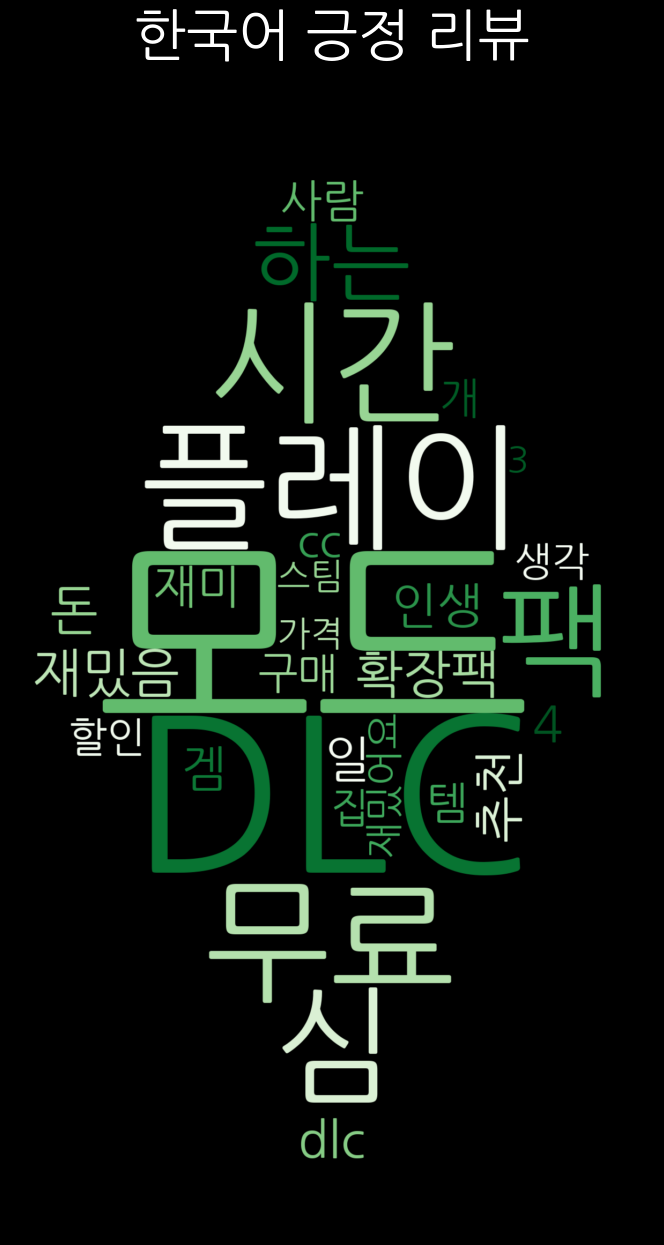

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_pos_kor)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('한국어 긍정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

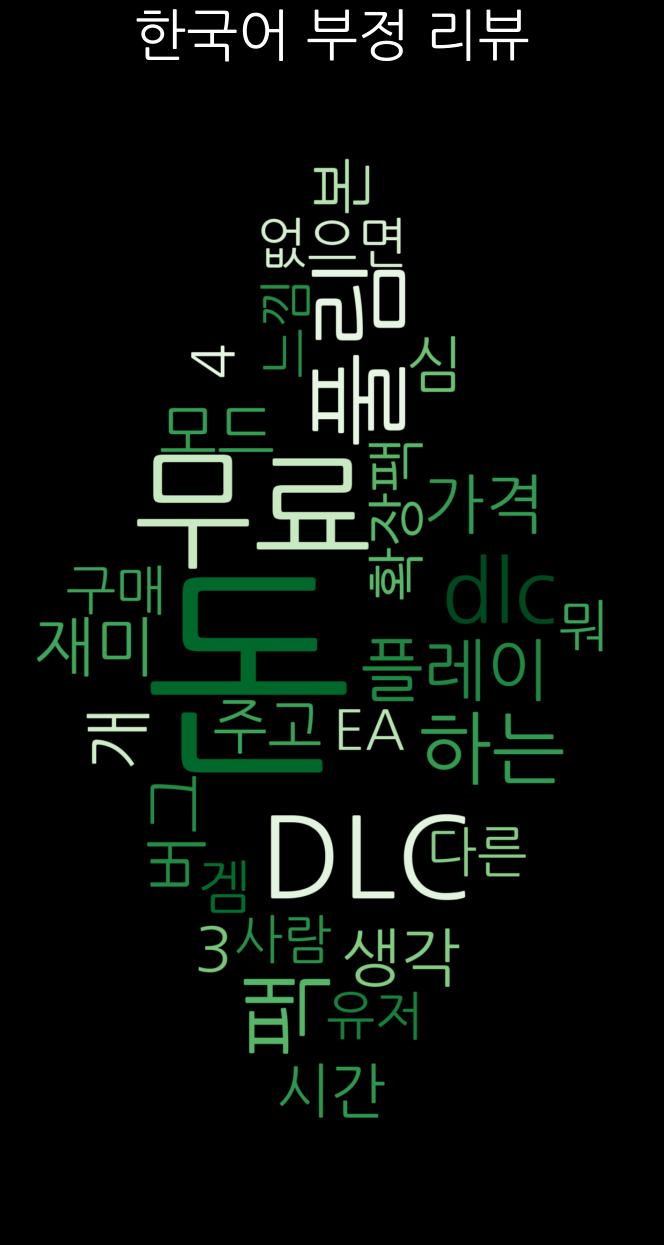

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_neg_kor)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('한국어 부정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

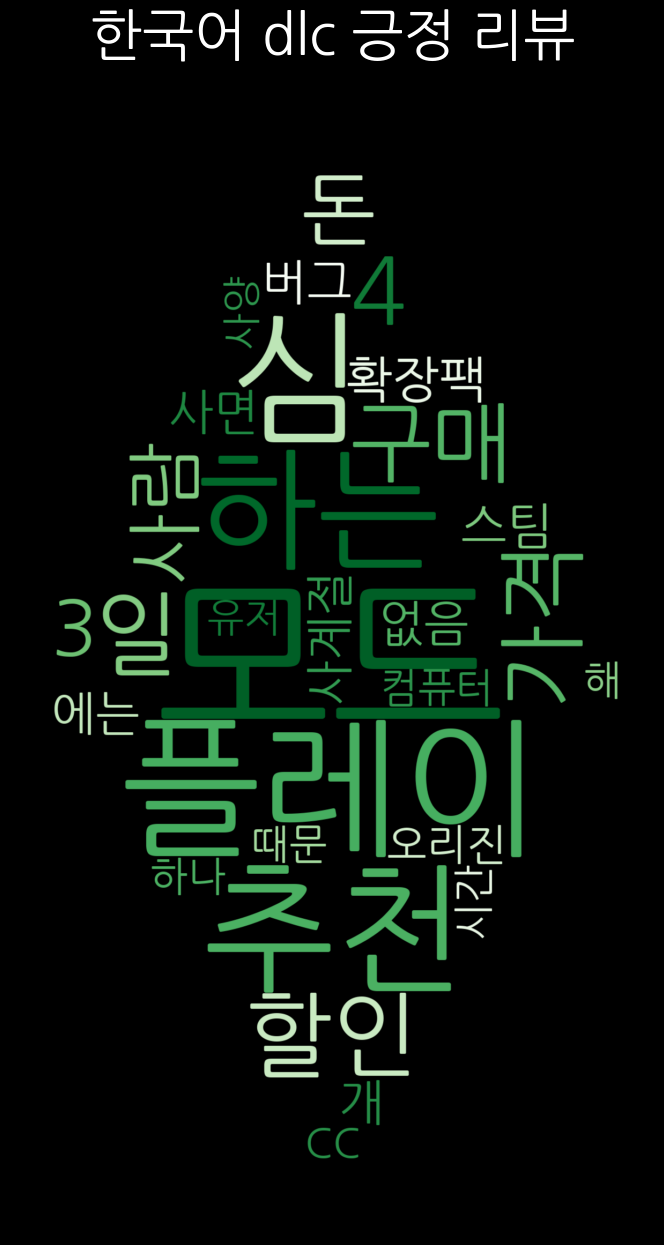

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_pos_dlc_kor)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('한국어 dlc 긍정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_neg_dlc_kor)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('한국어 dlc 부정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_pos_eng)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('영어 긍정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_neg_eng)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('영어 부정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_pos_dlc_eng)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('영어 dlc 긍정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

In [ ]:
# 워드클라우드 생성
wc.generate_from_frequencies(counter_neg_dlc_eng)

# 그래프(캔버스) 설정
plt.figure(figsize=(20, 15))  #
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('영어 dlc 부정 리뷰', color='white', pad=20, fontsize=40)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.show()

# 워드 네트워크 그리기

In [ ]:
from apyori import apriori

In [ ]:
#필요 변수들 -> 이중리스트로 각 리뷰마다 감싸져있는 것들들
pos_kor_token
neg_kor_token
pos_dlc_kor_token
neg_dlc_kor_token
pos_eng_token
neg_eng_token
pos_dlc_eng_token
neg_dlc_eng_token

[['product',
  'even',
  'mods',
  'bore',
  'need',
  'hundred',
  'pack',
  'make',
  'less',
  'repetitive',
  'even',
  'theyre',
  'shallow',
  'play',
  'hour',
  'two',
  'top',
  'ea',
  'moneyhungry',
  'product',
  'even',
  'mods',
  'bore',
  'need',
  'hundred',
  'pack',
  'make',
  'less',
  'repetitive',
  'even',
  'theyre',
  'shallow',
  'play',
  'hour',
  'two',
  'top',
  'ea',
  'moneyhungry'],
 ['4', 'positive', 'review', '3999', '4', 'positive', 'review', '3999'],
 ['700',
  'hours',
  'play',
  'im',
  'officially',
  'give',
  'become',
  'buggy',
  'beyond',
  'belief',
  'ea',
  'update',
  'every',
  '2',
  'weeks',
  'make',
  'redownload',
  'mods',
  'use',
  'need',
  'order',
  'make',
  'fun',
  'even',
  'playable',
  'time',
  'bug',
  'glitches',
  'every',
  'patch',
  'come',
  'bug',
  'problems',
  'every',
  'introduce',
  'gamebreaking',
  'problems',
  'theyve',
  'start',
  'months',
  'long',
  'events',
  'buggy',
  'literally',
  'unpla

In [ ]:
result = list(apriori(pos_kor_token))
print(result)
df_ap_pos_kor = pd.DataFrame(result)
df_ap_pos_kor

In [ ]:
for i in pos_kor_token:
    print(i)

In [ ]:
list_1=[['옛날', '부터', '해보고', '싶었는데', '나쁘지', '않네요', '시간', '순식간', '사라짐', '옛날', '부터', '해보고', '싶었는데', '나쁘지', '않네요', '시간', '순식간', '사라짐'],
['잼', '잼'],
['할수록', '재밌다', '할수록', '재밌다'],
['개', '존잼', '개', '존잼'],
['씨발', '존나', '멋져', '씨발', '존나', '멋져'],
['재밌어요', '재밌어요'],
['인생', '최고', '이에요', '꽃돔', '결혼', '하자', '인생', '최고', '이에요', '꽃돔', '결혼', '하자'],
['시간', '순', '사악', '시간', '순', '사악']]